# Stock Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["FB", "AMZN", "PG", "XOM", "JPM", "JNJ", "HON", "LIN", "AMT", "AAPL", "NEE"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
stock_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

stock_prices_df

AAPL                                         \
                             open      high       low   close     volume   
time                                                                       
2020-01-02 00:00:00-05:00  296.24  300.6000  295.1900  300.58   30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.5000  297.38   31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.7500  299.78   27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.4800  298.27   24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.1560  303.15   28984028   
...                           ...       ...       ...     ...        ...   
2020-12-24 00:00:00-05:00  131.32  133.4600  131.1000  131.99   51675667   
2020-12-28 00:00:00-05:00  133.99  137.3400  133.5100  136.73  116008068   
2020-12-29 00:00:00-05:00  138.05  138.7890  134.3409  134.93  114407189   
2020-12-30 00:00:00-05:00  135.58  135.9900  133.4000  133.72   87788124   
2020-12-31 00:00:00-05:00  134.08  134.7400  131.7200  132.58   86901528   

                              AMT                                       ...  \
                             open      high       low   close   volume  ...   
time                                                                    ...   
2020-01-02 00:00:00-05:00  229.68  231.1499  228.0051  228.50  1205047  ...   
2020-01-03 00:00:00-05:00  227.56  229.8300  227.0000  228.63  1293710  ...   
2020-01-06 00:00:00-05:00  228.48  230.0000  227.8922  228.51  1077776  ...   
2020-01-07 00:00:00-05:00  227.13  227.5700  221.6200  223.68  1159574  ...   
2020-01-08 00:00:00-05:00  223.48  226.4850  222.7900  225.56   963541  ...   
...                           ...       ...       ...     ...      ...  ...   
2020-12-24 00:00:00-05:00  216.44  219.3900  216.1900  218.64   581627  ...   
2020-12-28 00:00:00-05:00  218.87  221.4500  217.4300  221.04  1078952  ...   
2020-12-29 00:00:00-05:00  222.21  223.4200  220.4200  220.48  1028791  ...   
2020-12-30 00:00:00-05:00  220.51  221.5300  219.3500  220.52  1144758  ...   
2020-12-31 00:00:00-05:00  219.76  224.6650  219.6000  224.30  1297773  ...   

                               PG                                         XOM  \
                             open      high       low   close   volume   open   
time                                                                            
2020-01-02 00:00:00-05:00  124.50  124.7300  122.9400  123.41  5965498  70.24   
2020-01-03 00:00:00-05:00  122.16  123.5300  121.8600  122.53  5620548  71.34   
2020-01-06 00:00:00-05:00  122.57  123.1900  122.3787  122.75  4535596  70.32   
2020-01-07 00:00:00-05:00  122.88  123.2059  121.8700  122.01  4816902  70.50   
2020-01-08 00:00:00-05:00  122.19  123.4299  122.0003  122.52  3402838  70.11   
...                           ...       ...       ...     ...      ...    ...   
2020-12-24 00:00:00-05:00  136.20  138.1300  136.2000  137.81  2076306  41.65   
2020-12-28 00:00:00-05:00  138.15  139.3935  137.9450  138.72  2916003  41.69   
2020-12-29 00:00:00-05:00  139.22  139.9400  138.2000  138.45  3713102  42.04   
2020-12-30 00:00:00-05:00  138.60  138.9214  137.5500  137.80  2260510  41.33   
2020-12-31 00:00:00-05:00  138.31  139.2900  137.3900  139.00  2561486  41.47   

                                                              
                             high      low   close    volume  
time                                                          
2020-01-02 00:00:00-05:00  71.020  70.2368  70.900  10586614  
2020-01-03 00:00:00-05:00  71.370  70.1600  70.320  14148606  
2020-01-06 00:00:00-05:00  71.355  70.2300  70.870  16859539  
2020-01-07 00:00:00-05:00  70.520  69.5100  70.280  11647527  
2020-01-08 00:00:00-05:00  70.140  69.1700  69.235  11957848  
...                           ...      ...     ...       ...  
2020-12-24 00:00:00-05:00  41.850  41.3800  41.617   7579279  
2020-12-28 00:00:00-05:00  42.550  41.5200  41.730  22892003  
2020-12-29 00:00:00-05:00  42

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
stock_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  stock_closing_prices_df[ticker] = stock_prices_df[ticker]["close"]

stock_closing_prices_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2020-01-02 00:00:00-05:00,209.7800,1897.71,123.41,70.900,141.09,146.00,180.76,210.75,228.50,300.58,238.61
2020-01-03 00:00:00-05:00,208.5100,1874.93,122.53,70.320,138.28,144.22,178.86,205.26,228.63,297.38,240.21
2020-01-06 00:00:00-05:00,212.5855,1903.33,122.75,70.870,138.21,144.11,177.50,204.37,228.51,299.78,241.51
2020-01-07 00:00:00-05:00,213.0500,1906.86,122.01,70.280,135.87,144.99,177.62,204.83,223.68,298.27,241.33
2020-01-08 00:00:00-05:00,215.3000,1892.09,122.52,69.235,136.97,144.92,177.75,207.36,225.56,303.15,241.17
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,267.3200,3171.16,137.81,41.617,124.56,152.53,209.54,256.93,218.64,131.99,74.96
2020-12-28 00:00:00-05:00,277.0000,3283.96,138.72,41.730,125.37,153.24,209.88,260.01,221.04,136.73,75.50
2020-12-29 00:00:00-05:00,276.7800,3320.71,138.45,41.270,125.02,154.24,209.13,259.34,220.48,134.93,75.36


### Calculate Aggregate Daily Returns for Portfolio

In [11]:
# Calculate the daily returns for of the Stock Portfolio
stock_daily_returns_df = stock_closing_prices_df.sum(axis=1).pct_change().dropna()
stock_daily_returns_df

time
2020-01-03 00:00:00-05:00   -0.010395
2020-01-06 00:00:00-05:00    0.009273
2020-01-07 00:00:00-05:00   -0.001265
2020-01-08 00:00:00-05:00   -0.000740
2020-01-09 00:00:00-05:00    0.007193
                               ...   
2020-12-24 00:00:00-05:00   -0.002233
2020-12-28 00:00:00-05:00    0.028436
2020-12-29 00:00:00-05:00    0.006608
2020-12-30 00:00:00-05:00   -0.006866
2020-12-31 00:00:00-05:00   -0.003595
Length: 252, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

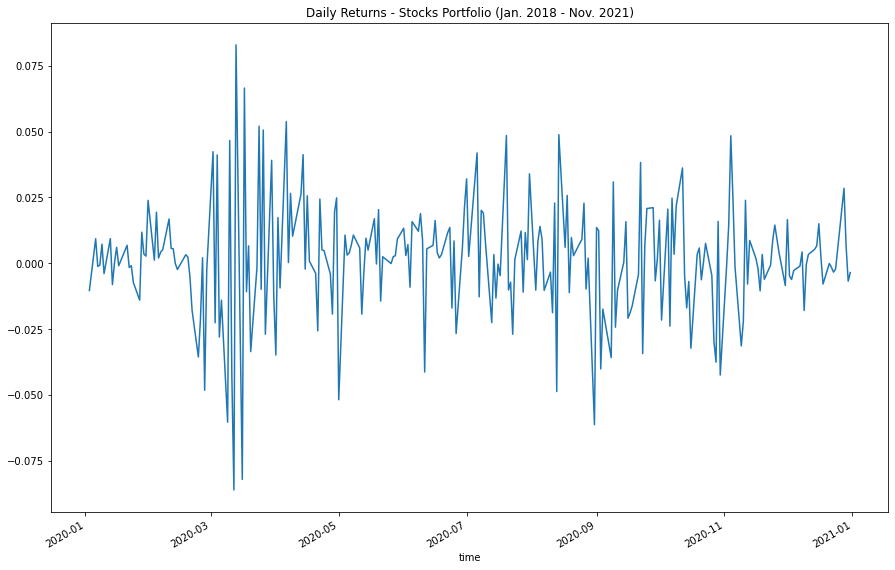

In [12]:
# Plot daily returns for the stocks portfolio
stock_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [13]:
# Set up Monte Carlo Simulation for a 5 year time period with a $10,000 initial investment
MC_stock_ten_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_stock_ten_year.portfolio_data.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  28984028   

                                           AMT                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-01-02 00:00:00-05:00          NaN  229.68  231.1499  228.0051  228.50   
2020-01-03 00:00:00-05:00    -0.010646  227.56  229.8300  227.0000  228.63   
2020-01-06 00:00:00-05:00     0.008070  228.48  230.0000  227.8922  228.51   
2020-01-07 00:00:00-05:00    -0.005037  227.13  227.5700  221.6200  223.68   
2020-01-08 00:00:00-05:00     0.016361  223.48  226.4850  222.7900  225.56   

                           ...        PG                                  XOM  \
                           ...       low   close   volume daily_return   open   
time                       ...                                                  
2020-01-02 00:00:00-05:00  ...  122.9400  123.41  5965498          NaN  70.24   
2020-01-03 00:00:00-05:00  ...  121.8600  122.53  5620548    -0.007131  71.34   
2020-01-06 00:00:00-05:00  ...  122.3787  122.75  4535596     0.001795  70.32   
2020-01-07 00:00:00-05:00  ...  121.8700  122.01  4816902    -0.006029  70.50   
2020-01-08 00:00:00-05:00  ...  122.0003  122.52  3402838     0.004180  70.11   

                                                                           
                             high      low   close    volume daily_return  
time                                                                       
2020-01-02 00:00:00-05:00  71.020  70.2368  70.900  10586614          NaN  
2020-01-03 00:00:00-05:00  71.370  70.1600  70.320  14148606    -0.008181  
2020-01-06 00:00:00-05:00  71.355  70.2300  70.870  16859539     0.007821  
2020-01-07 00:00:00-05:00  70.520  69.5100  70.280  11647527    -0.008325  
2020-01-08 00:00:00-05:00  70.140  69.1700  69.235  11957848    -0.014869  

[5 rows x 66 columns]

### Run the MC Simulation for 10 Years

In [14]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988338,1.000745,0.988729,1.001576,0.995608,1.023088,0.989944,1.030282,0.988311,1.004696,...,1.020107,1.012612,0.995367,1.010804,1.010411,0.997410,1.014835,0.998528,1.011711,0.991892
2,0.971480,1.002982,0.996981,0.986660,1.003776,1.029893,0.982387,1.023879,0.993541,0.995438,...,1.009407,1.025506,0.995047,1.025758,0.990414,1.017310,1.009171,0.988718,1.000357,0.979047
3,0.971724,1.017113,0.994664,0.983586,1.005022,1.051502,0.987889,1.024995,0.986595,0.996653,...,1.000194,1.025606,0.991582,1.030472,0.998904,1.026884,1.002197,0.989851,1.008497,0.984425
4,0.990232,1.021395,1.011522,0.984531,0.987575,1.048878,0.980978,1.019766,0.998685,0.997486,...,1.012117,1.017913,0.989120,1.045266,0.979838,1.030863,0.998644,0.981164,1.009235,0.986083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.519643,3.531969,1.540489,3.994508,1.813159,1.578881,2.878506,1.657019,1.398691,1.486983,...,2.032372,2.182010,1.293489,1.690587,1.736212,1.681532,3.819525,3.444817,2.975130,2.430936
2517,1.512784,3.590055,1.546424,4.010889,1.861411,1.602021,2.902963,1.659325,1.396782,1.506247,...,2.030730,2.207510,1.311302,1.679132,1.729405,1.691257,3.806134,3.461796,2.960476,2.453779
2518,1.520687,3.597601,1.535189,3.994072,1.894513,1.599646,2.894531,1.681044,1.408733,1.505941,...,2.013860,2.228917,1.334043,1.668116,1.729004,1.683209,3.848950,3.500158,2.933281,2.486132
2519,1.515457,3.559809,1.523895,3.976540,1.897085,1.610556,2.894424,1.695362,1.410749,1.497889,...,2.028796,2.233137,1.356336,1.639774,1.724299,1.700515,3.835237,3.496570,2.903283,2.476346


In [ ]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
MC_five_year.plot_simulation()

In [ ]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation 
# by plotting a histogram
MC_five_year.plot_distribution()

In [ ]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
MC_five_year_summary_statistics = MC_five_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_five_year_summary_statistics)

In [ ]:
# Calculate the confidence interval lower and upper projections for a $10,000 initial investment
five_year_lower_ci = round(MC_five_year_summary_statistics[8]*10000, 2)
five_year_upper_ci = round(MC_five_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${five_year_lower_ci} and ${five_year_upper_ci}")

In [ ]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_ten_year = MCSimulation(
  portfolio_data=prices_df,
  weights=[.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .09],
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_ten_year.portfolio_data.head()

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_year.plot_simulation()

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year.plot_distribution()

In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_year_summary_statistics = MC_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_ten_year_summary_statistics)

In [ ]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment
ten_year_lower_ci = round(MC_ten_year_summary_statistics[8]*10000, 2)
ten_year_upper_ci = round(MC_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of ${ten_year_lower_ci} and ${ten_year_upper_ci}")

In [ ]:
# Set up Monte Carlo Simulation for a 15-year time period with a $10,000 initial investment
MC_fifteen_year = MCSimulation(
  portfolio_data=prices_df,
  weights=[.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .09],
  num_simulation=1000,
  num_trading_days=252 * 15
)

MC_fifteen_year.portfolio_data.head()

In [ ]:
# Run the Monte Carlo simulation to forecast 15 years cumulative returns
MC_fifteen_year.calc_cumulative_return()

In [ ]:
# Visualize the 15-year Monte Carlo simulation by creating an
# overlay line plot
MC_fifteen_year.plot_simulation()

In [ ]:
# Visualize the probability distribution of the 15-year Monte Carlo simulation 
# by plotting a histogram
MC_fifteen_year.plot_distribution()

In [ ]:
# Generate summary statistics from the 15-year Monte Carlo simulation results
# Save the results as a variable
MC_fifteen_year_summary_statistics = MC_fifteen_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_fifteen_year_summary_statistics)

In [ ]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment
fifteen_year_lower_ci = round(MC_fifteen_year_summary_statistics[8]*10000, 2)
fifteen_year_upper_ci = round(MC_fifteen_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of ${fifteen_year_lower_ci} and ${fifteen_year_upper_ci}")